# Vectorization: an introduction to universal functions

In this notebook, you will learn about
- When and how to vectorize code
- Why this works: ufuncs
- Saving data for later use with `np.savez`
- Basic built-in NumPy tools for plotting and integrating with Matplotlib.
- Examples and applications

---

## 1. Broadcasting

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations. There are, however, cases where broadcasting is a bad idea because it leads to inefficient use of memory that slows computation.

In [1]:
import numpy as np

NumPy operations are usually done on pairs of arrays on an element-by-element basis. In the simplest case, the two arrays must have exactly the same shape, as in the following example:

In [2]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])
a * b

array([2., 4., 6.])

NumPy’s broadcasting rule relaxes this constraint when the arrays’ shapes meet certain constraints. The simplest broadcasting example occurs when an array and a scalar value are combined in an operation:

In [3]:
a = np.array([1.0, 2.0, 3.0])
b = 2.0
a * b

array([2., 4., 6.])

We can think of the scalar `b` being stretched during the arithmetic operation into an array with the same shape as `a`. The new elements in `b`, as shown in the figure below, are simply copies of the original scalar.

!["A scalar is broadcast to match the shape of the 1-d array it is being multiplied to."](https://numpy.org/devdocs/_images/broadcasting_1.svg)

We will continue using the example of [Notebook 1](01_Intro.ipynb):

In [4]:
import pandas as pd

quality_of_life = pd.read_csv('../data/quality_of_life_index.csv')
quality_index = np.array(quality_of_life['Quality of Life Index'])
quality_cost_pollution = np.array(quality_of_life[['Quality of Life Index', 'Cost of Living Index', 'Pollution Index']]) 

From the [Numbeo website](https://www.numbeo.com/quality-of-life/indices_explained.jsp), the formula for the Quality of Life Index involves a combination of a weighted sum of the other indices in our `quality_of_life` DataFrame. Let's say we wanted to renormalize every value in our `quality_cost_pollution` array by the `quality_of_life` index. Because of the broadcasting properties of NumPy arrays, this can be done by putting together a few of the things we've learned:

In [5]:
renormalized_values = quality_cost_pollution/quality_index[:, np.newaxis]

In [6]:
renormalized_values

array([[1.        , 0.37157083, 0.06599629],
       [1.        , 0.36737519, 0.09026199],
       [1.        , 0.33074373, 0.11188085],
       [1.        , 0.39416543, 0.06994329],
       [1.        , 0.3627907 , 0.14536162],
       [1.        , 0.36138741, 0.13379374],
       [1.        , 0.66502565, 0.09327875],
       [1.        , 0.33763654, 0.11508911],
       [1.        , 0.34292767, 0.19171175],
       [1.        , 0.35439647, 0.09969535],
       [1.        , 0.38651567, 0.14248091],
       [1.        , 0.34951712, 0.16433585],
       [1.        , 0.39475074, 0.10963245],
       [1.        , 0.41513053, 0.12466702],
       [1.        , 0.42123618, 0.12007726],
       [1.        , 0.3581913 , 0.22538846],
       [1.        , 0.43411567, 0.12222885],
       [1.        , 0.64985599, 0.13738384],
       [1.        , 0.36341836, 0.17119032],
       [1.        , 0.4701041 , 0.15544776],
       [1.        , 0.37978008, 0.09541003],
       [1.        , 0.4010294 , 0.08005257],
       [1.

## 2. Universal Functions

These operations are called [Universal Functions (ufunc)](https://numpy.org/doc/stable/reference/generated/numpy.ufunc.html), which are functions that operate on ndarrays in an element-by-element fashion, supporting array broadcasting, type casting, and several other standard features. That is, a ufunc is a “vectorized” wrapper for a function that takes a fixed number of specific inputs and produces a fixed number of specific outputs.

This is what makes mathematical operations work with ndarrays. We've seen a few arithmetic operations, but it's also possible to apply boolean operations, like `<`, `>` or `==` to ndarrays. NumPy has a number of other `ufunc` functions that operate on each element, such as

- sine and cosine: `np.sin` and `np.cos`
- exponential $e^x$: `np.exp(x)`
- logarithms $\log(x)$: `np.log(x)`

and others.

Going back to our example, we can compute

In [7]:
np.log(quality_index)

array([5.32232682, 5.30975174, 5.30871314, 5.27673616, 5.27632735,
       5.26801279, 5.26253474, 5.25399969, 5.2490746 , 5.24902207,
       5.24623429, 5.24433625, 5.24364997, 5.23484494, 5.2277876 ,
       5.22569291, 5.21759526, 5.2149901 , 5.21210567, 5.21205117,
       5.20833795, 5.20746225, 5.20466581, 5.19998763, 5.19822075,
       5.19584157, 5.19295685, 5.19206757, 5.18688289, 5.18060308,
       5.18015301, 5.17699683, 5.17518882, 5.17167647, 5.16820868,
       5.16512877, 5.16347082, 5.16312746, 5.16123683, 5.15859542,
       5.15773259, 5.15721453, 5.15577406, 5.1551396 , 5.15450473,
       5.15375392, 5.15259771, 5.15236631, 5.15138226, 5.14819191,
       5.14656381, 5.14522446, 5.14131262, 5.14096156, 5.13385537,
       5.13326582, 5.13261691, 5.12758836, 5.12752905, 5.12741041,
       5.12169951, 5.1158358 , 5.11571577, 5.11445462, 5.11415411,
       5.11060129, 5.10824586, 5.10624846, 5.10436847, 5.10370053,
       5.10339677, 5.10266738, 5.10236331, 5.09852406, 5.09840

---

## 3. Combining Broadcasting and Universal Functions to catch a baseball

![Notes for broadcasting and ufunc applications in catching a baseball](../images/03_vectorization-notes.png)

Consider the motion of a ball thrown from one person to another. The path of the ball is defined here as

- $x(t) = x_0 + v_x t$ the forward distance of the ball
- $y(t) = y_0 + v_y t - \frac{g}{2}t^2$ the height of the ball

where

- $x_0 = 0~m$ is the initial distance travelled
- $v_x$ is the initial forward speed of the ball
- $y_0$ is the initial height of the ball
- $v_y$ is the initial upward speed of the ball
- $g = 9.81~\frac{m}{s^2}$ is the acceleration due to gravity

Let's use NumPy to find all the locations where a 175-cm person can stand to catch a ball thrown from $x_0=0~m$ and $y_0=2~m$ high at $v_x = 3.5~m$ and $v_y = 4.5~m$. 

You will do this in five steps:

1. define your constants: $x_0,~v_x,~y_0,~v_y,~g$
2. define your independent variable, time, as a NumPy array
3. calculate the positions using time and your constants
4. plot the path of the ball
5. find the x-locations where $y(t)<0.175~m$

### 3.1. Define your constants

First, define the variables that are constant in the functions, $x(t)$ and $y(t)$:

- $x_0$ as `x0`
- $y_0$ as `y0`
- $v_x$ as `vx`
- $v_y$ as `vy`
- $g$ as `g`

In [15]:
x0 = 0
y0 = 2

vx = 3.5
vy = 4.5
g = 9.81

### 3.2. Define your independent variable, time, as a NumPy array

Now, you will use a built-in NumPy function, [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) to create the independent variable $t$ as `time`. The function `np.linspace` uses three arguments to define an array, as such

```python
time = np.linspace(start, end, number_of_steps)
```

- the `start` creates the first value in the array `time`
- the `end` creates the last value in the array `time`
- the `number_of_steps` defines how many steps to take between `start` and `end`

In [57]:
time = np.linspace(0, 1, 21)

**Note** `np.linspace` is very similar to `np.arange`, but you should be aware that `np.arange` may give unexpected results due to loss of precision. Check [the `np.arange` docstring](https://numpy.org/devdocs/reference/generated/numpy.arange.html) for more details.

Consider the output from the array, `time`. Here you `print` some descriptions of how `np.linspace` defined your array. 

In [58]:
print('Your independent variable is time')
print('time starts at {} s and ends at {} s'.format(time[0], time[-1]))
print()
print('it has {} time steps and each step is {} s'.format(len(time), time[1] - time[0]))

Your independent variable is time
time starts at 0.0 s and ends at 1.0 s

it has 21 time steps and each step is 0.05 s


### 3.3. Calculate the positions using time and your constants

Now, that you have a NumPy array, you can plug it directly into equations to create new arrays. Next you define 

- `x` as $x(t) = x_0 + v_x t$ the forward distance of the ball
- `y` as $y(t) = y_0 + v_y t - \frac{g}{2}t^2$ the height of the ball

NumPy arrays make defining these functions straightforward. In the array `x`, each value of time [0, 0.05, ..., 1] s was multiplied by the initial speed, `vx`, then added to the initial position, `x0`. No need to create a `for`-loop and define each value of `x`. 

In [59]:
x = x0 + vx*time
y = y0 + vy*time -g/2*time**2

### 3.4. Plot the path of the ball

Now, you have defined three arrays, `t`, `x`, and `y`. Each of these arrays is the same shape `(21, )`. 

In [60]:
print(np.shape(time))
print(np.shape(x))
print(np.shape(y))

(21,)
(21,)
(21,)


Because they are all the same shape, you can use [Matplotlib](https://matplotlib.org/stable/index.html) to see how the ball will travel through the air. Here, you use `plt.plot` to plot $y(t)$ vs $x(t)$. 

Text(0, 0.5, 'height (m)')

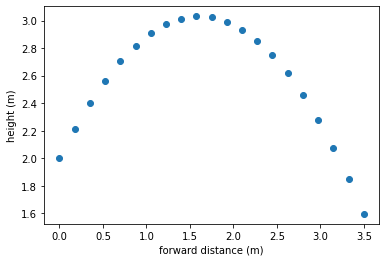

In [61]:
plt.plot(x, y, 'o')
plt.xlabel('forward distance (m)')
plt.ylabel('height (m)')

By plotting the path of the ball, notice how the height is over 2 meters for most of the time in the air. Somewhere past $x(t) = 3~m$ the ball is getting back to its original height of $2~m$. Next, you can find what those positions and times are. 

### 3.5. Find the x-locations where $y(t)<1.75~m$

Now, you want to find the locations to stand _and even when to catch the ball_. You can use another `ufunc` function that operates on every element in the variable `y`. Use the `<` operator to check when $y(t) < 1.75~m$

In [62]:
y

array([2.       , 2.2127375, 2.40095  , 2.5646375, 2.7038   , 2.8184375,
       2.90855  , 2.9741375, 3.0152   , 3.0317375, 3.02375  , 2.9912375,
       2.9342   , 2.8526375, 2.74655  , 2.6159375, 2.4608   , 2.2811375,
       2.07695  , 1.8482375, 1.595    ])

In [63]:
y < 1.75

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True])

The result is a list of `True` and `False` statements. 
- If the value of `y` is more than $1.75~m$, then the result is `False` 
- If the value of `y` is less than $1.75~m$, then the result is `True`

Now, you can use this list of `True`/`False` statements to just look at the times and positions of the ball when the statement is `True`, using advanced indexing:

In [64]:
time[y < 1.75]

array([1.])

In [65]:
x[y < 1.75]

array([3.5])

In [66]:
y[y < 1.75]

array([1.595])

Text(0, 0.5, 'height (m)')

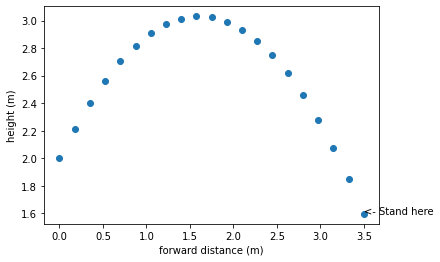

In [67]:
plt.plot(x, y, 'o')
for ystand in y[y < 1.75]:
    plt.text(x[y == ystand], ystand, '<- Stand here')
plt.xlabel('forward distance (m)')
plt.ylabel('height (m)')

The result is that at $t = 1~s$, the ball has travelled $x(t=1) = 3.5~m$ and will be $y(t=1) = 1.595~m$ high. This is a great place to stand to catch the ball, just be ready!

---

## Read more
- [NumPy functions and methods overview](https://numpy.org/devdocs/user/quickstart.html#functions-and-methods-overview)
- [NumPy Quickstart guide](https://numpy.org/devdocs/user/quickstart.html)
- [NumPy for absolute beginners](https://numpy.org/devdocs/user/absolute_beginners.html)
- [Broadcasting](https://numpy.org/devdocs/user/basics.broadcasting.html)

## Next

Go to [Notebook 4: Submodules](04_Submodules.ipynb).